In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import pygmt as pygmt
import geopandas as gpd 

In [4]:
PATH_EARTH = os.path.join("tectonic_settings_Earth")

PATH_VENUS = os.path.join("../tectonic_settings_Venus")

EARTH_ZONES = gpd.read_file(f"{PATH_EARTH}/all_tectonic_settings.shp")

OC_POL = gpd.read_file(f"{PATH_EARTH}/continental_crust_polygons.shp")

VENUS_CORONA = gpd.read_file(f"{PATH_VENUS}/corona.shp")
VENUS_RIFTS = gpd.read_file(f"{PATH_VENUS}/rifts.shp")
VENUS_RIDGES = gpd.read_file(f"{PATH_VENUS}/ridges.shp")

CORONA_TOTAREA = VENUS_CORONA['Area_julia'].sum()
RIFTS_TOTAREA = VENUS_RIFTS['Area_julia'].sum()
RIDGES_TOTAREA = VENUS_RIDGES['Area_julia'].sum()


In [5]:
VENUS_SURFAREA = 460234317 #km2

print(f"Area rifts:{RIFTS_TOTAREA}km2 = {round(RIFTS_TOTAREA/VENUS_SURFAREA*100,2)}% of total area")
print(f"Area coronae:{CORONA_TOTAREA}km2 = {round(CORONA_TOTAREA/VENUS_SURFAREA*100,2)}% of total area")
print(f"Area ridges:{RIDGES_TOTAREA}km2 = {round(RIDGES_TOTAREA/VENUS_SURFAREA*100,2)}% of total area")

Area rifts:37967130.85050429km2 = 8.25% of total area
Area coronae:35718832.78818725km2 = 7.76% of total area
Area ridges:7568096.239942103km2 = 1.64% of total area


In [6]:
PATH_DATA = os.path.join("earthquake_data")

quakes_cmt = pd.read_csv(f"{PATH_DATA}/cmt_2020.csv")

# CMT categorized by tectonic setting
settings = ["collision", "subduction", "rifts", "spreading", "transform", "intraplate-oceanic", "intraplate-continental"]

quakes_tec = {}
for i, k in enumerate(settings):
    quakes_tec[k] = pd.read_csv(f"{PATH_DATA}/quakes-{k}.csv")


/var/folders/58/ntm6z55s6r15gf87d4__hf180000gn/T/ipykernel_21912/4139804731.py:3: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  quakes_cmt = pd.read_csv(f"{PATH_DATA}/cmt_2020.csv")
/var/folders/58/ntm6z55s6r15gf87d4__hf180000gn/T/ipykernel_21912/4139804731.py:10: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  quakes_tec[k] = pd.read_csv(f"{PATH_DATA}/quakes-{k}.csv")


# Earth map

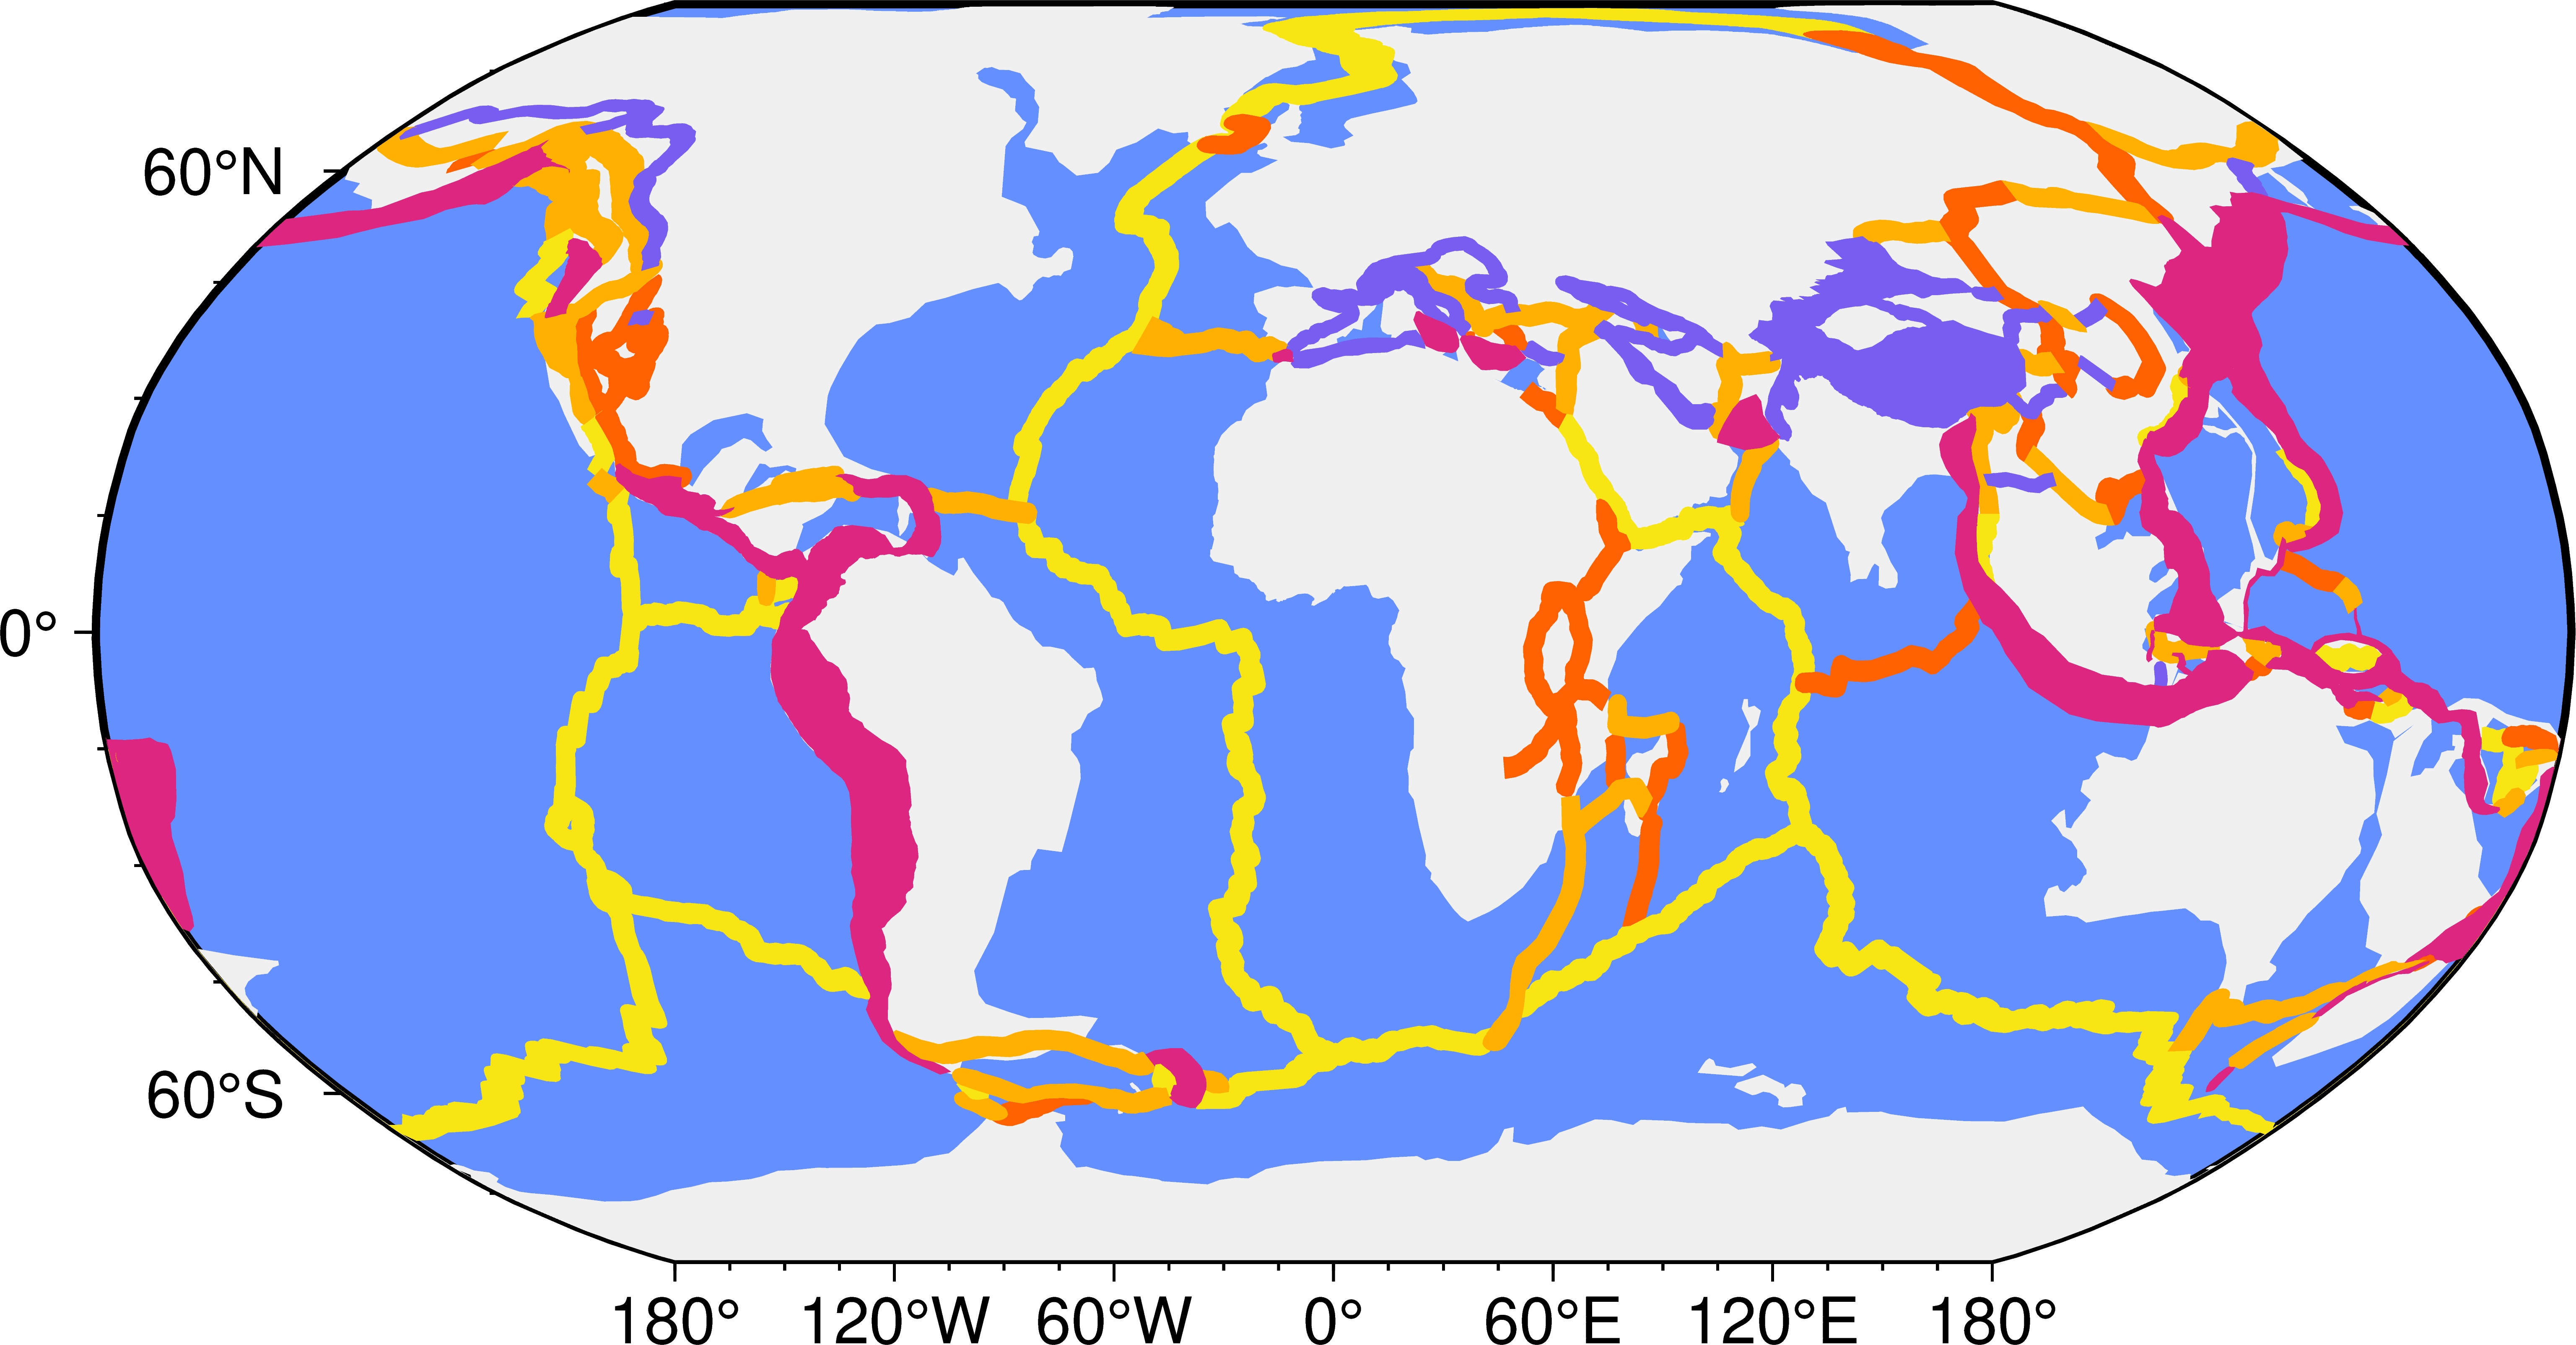

In [7]:
ZONE_TYPES = EARTH_ZONES["zone_type"].unique()
COLORS_ZONES = ["120/94/240", "220/38/127", "254/97/0", "247/230/20", "255/176/0"]


fig = pygmt.Figure()
pygmt.config(FONT="11p")
pygmt.config(FONT="Helvetica")
fig.basemap(region="g", projection="N0/15c", frame=["fa60","+g100/143/255"])

fig.plot(data=OC_POL, fill="240/240/240" ) 

for i,zone in enumerate(ZONE_TYPES):
    fig.plot(data=EARTH_ZONES[EARTH_ZONES.zone_type==zone], fill=COLORS_ZONES[i])

fig.show(dpi=1000, width=1000)

fig.savefig("map_Earth.png",       dpi=1000)


# Venus map

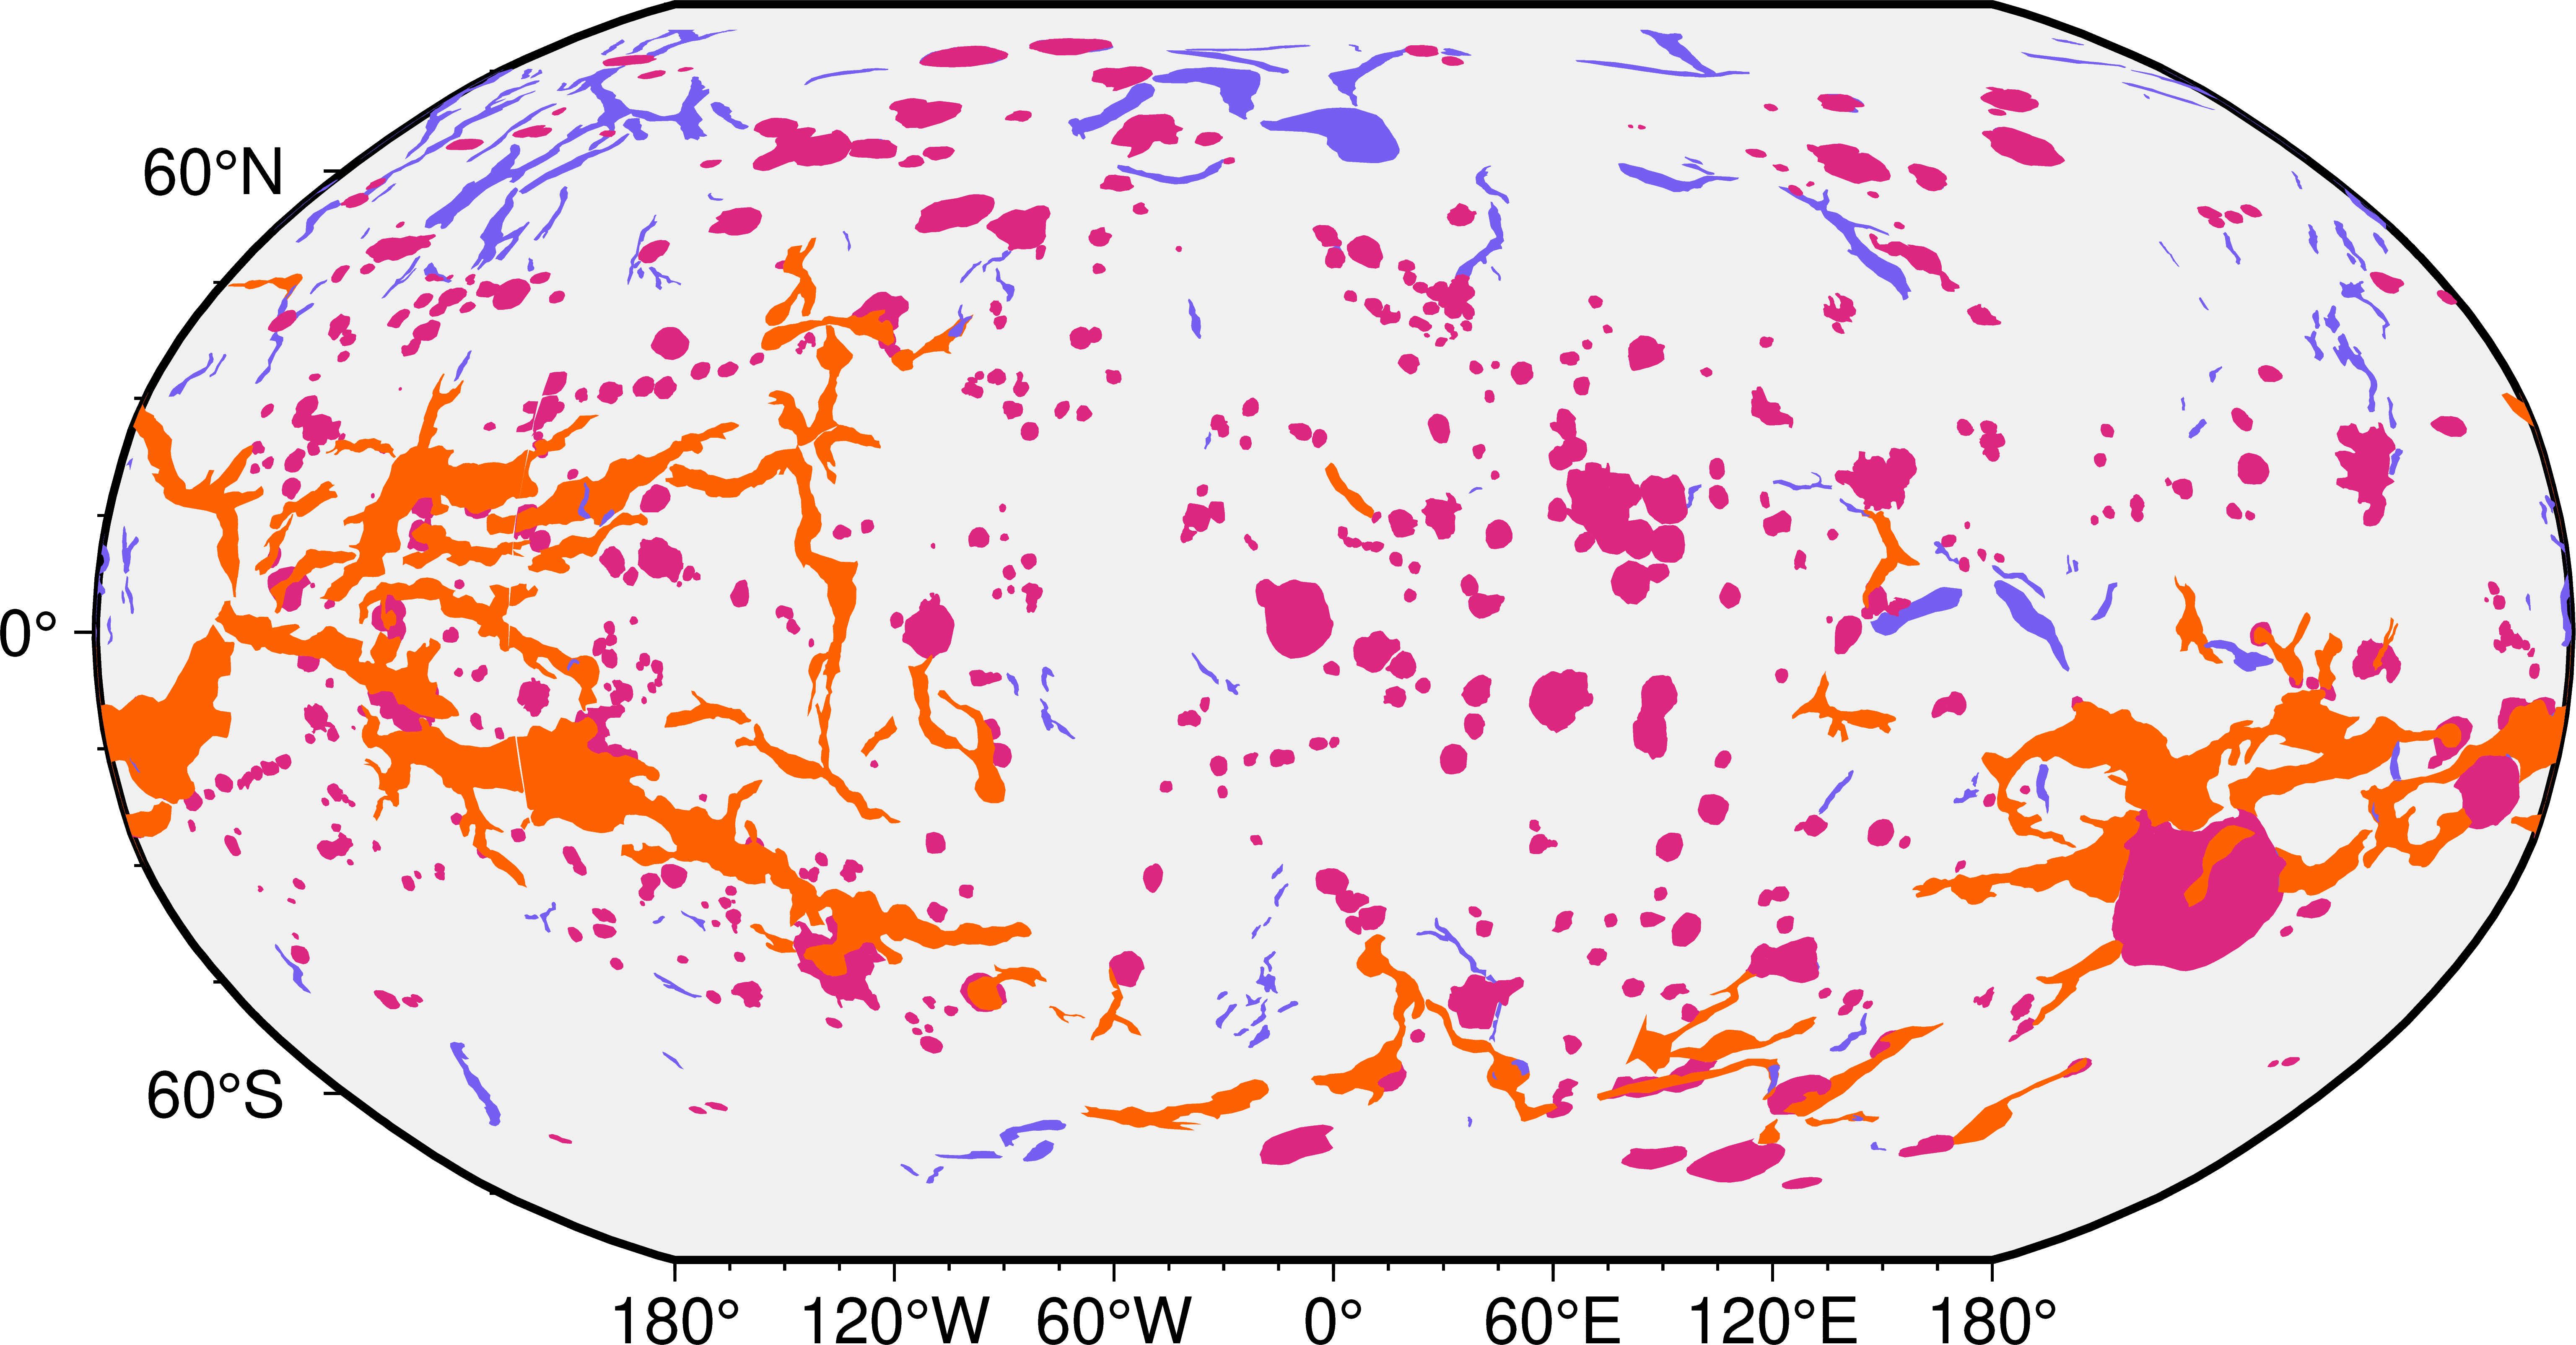

In [9]:

fig = pygmt.Figure()
pygmt.config(FONT="11p")
pygmt.config(FONT="Helvetica")

fig.basemap(region="g", projection="N0/15c", frame=["fa60","+g240/240/240"])

fig.plot(data=VENUS_RIFTS,  fill="254/97/0")
fig.plot(data=VENUS_CORONA, fill="220/38/127")
fig.plot(data=VENUS_RIDGES, fill="120/94/240")

fig.show(dpi=1000, width=1000)

fig.savefig("map_Venus.png",       dpi=1000)

# Earthquakes map

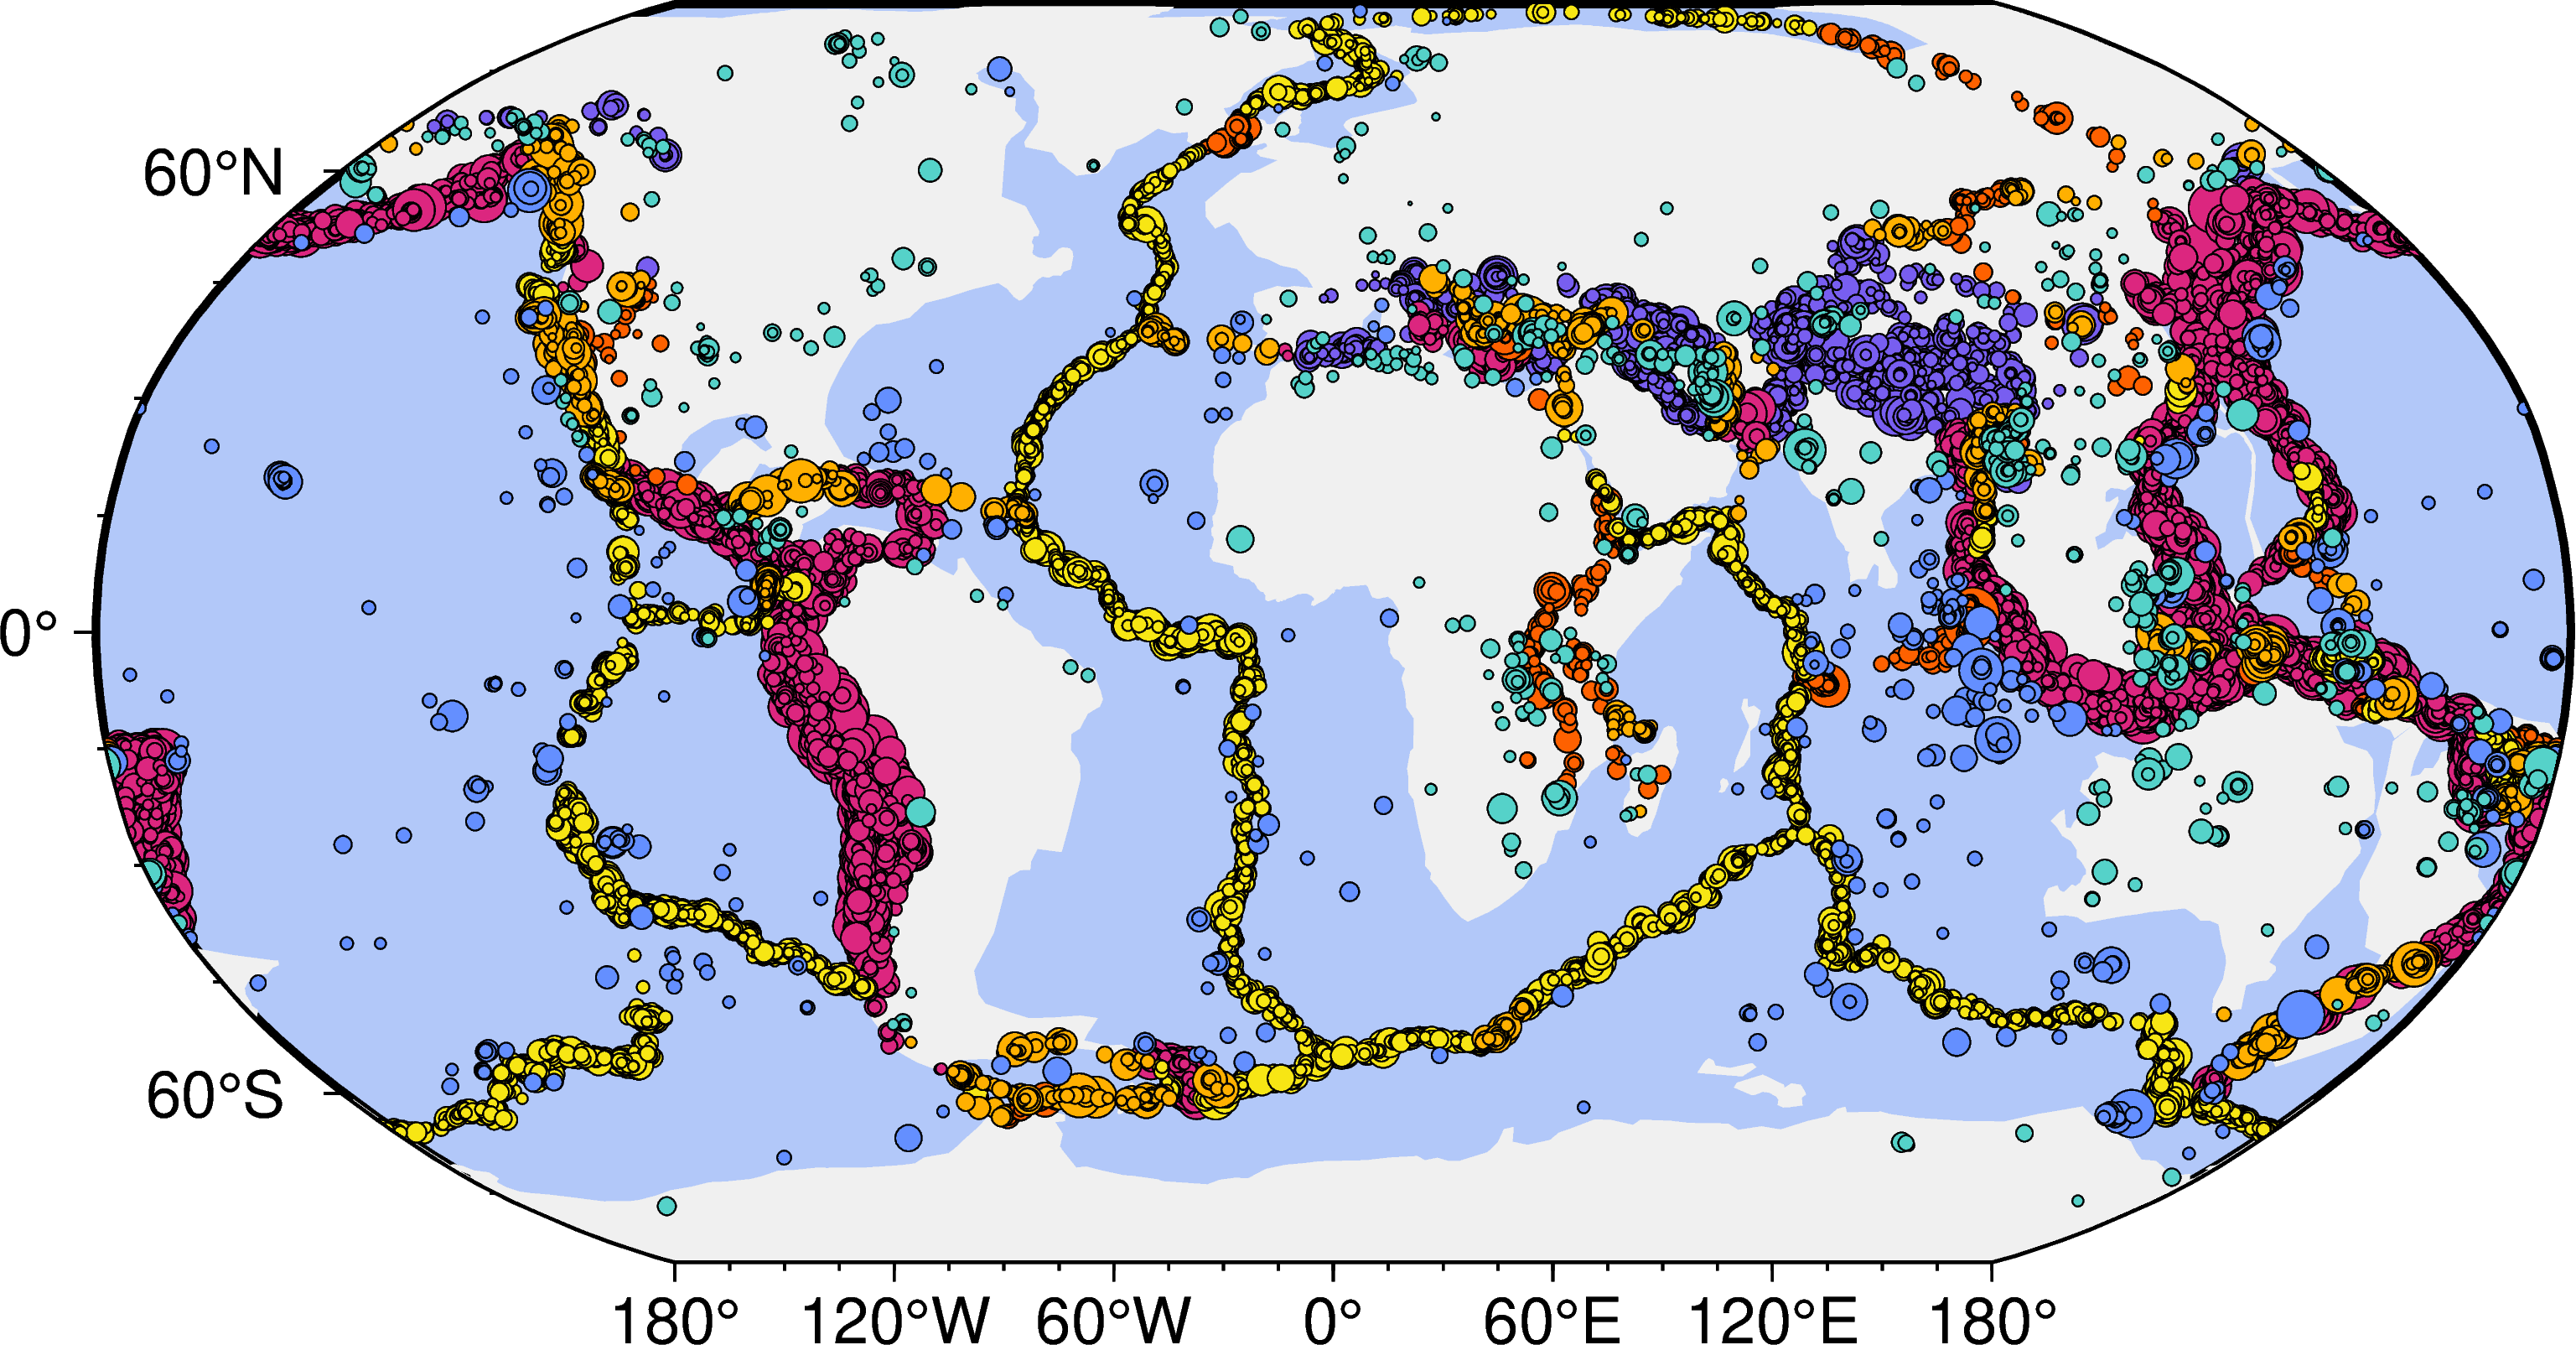

In [7]:
ZONE_TYPES = EARTH_ZONES["zone_type"].unique()
COLORS_ZONES = ["120/94/240", "220/38/127", "254/97/0", "247/230/20", "255/176/0", "100/143/255", "85/210/201"]

fig = pygmt.Figure()
pygmt.config(FONT="11p")
pygmt.config(FONT="Helvetica")
fig.basemap(region="g", projection="N0/15c", frame=["fa60","+g178/200/249"])

fig.plot(data=OC_POL, fill="240/240/240") 

for i, k in enumerate(settings):
    fig.plot(x=quakes_tec[k].Longitude, 
             y=quakes_tec[k].Latitude,
             fill=COLORS_ZONES[i],
             size=0.07*(((np.log10(quakes_tec[k].Moment)-9.05)/1.5)-4),
             style="cc",
             pen="black")

fig.show(dpi=500, width=1000)

fig.savefig("map_Earth_seismicity_tectonic_setting.png",       dpi=1000)
